In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import datetime


In [2]:
apps = pd.read_csv('apps.csv')

In [3]:
apps.drop('Unnamed: 0', axis = 1, inplace = True)

In [4]:
apps.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19.0,10000,Free,0.0,Everyone,Art & Design,2018-01-07,1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14.0,500000,Free,0.0,Everyone,Art & Design;Pretend Play,2018-01-15,2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7,5000000,Free,0.0,Everyone,Art & Design,2018-08-01,1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25.0,50000000,Free,0.0,Teen,Art & Design,2018-06-08,Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8,100000,Free,0.0,Everyone,Art & Design;Creativity,2018-06-20,1.1,4.4 and up


In [5]:
reviews = pd.read_csv('with_labels.csv')

In [6]:
apps.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8207 entries, 0 to 8206
Data columns (total 13 columns):
App               8207 non-null object
Category          8207 non-null object
Rating            8207 non-null float64
Reviews           8207 non-null int64
Size              8207 non-null float64
Installs          8207 non-null int64
Type              8207 non-null object
Price             8207 non-null float64
Content Rating    8207 non-null object
Genres            8207 non-null object
Last Updated      8207 non-null object
Current Ver       8207 non-null object
Android Ver       8207 non-null object
dtypes: float64(3), int64(2), object(8)
memory usage: 833.6+ KB


In [7]:
apps['Last Updated'] = pd.to_datetime(apps['Last Updated'])

# Exploratory Data Analysis

In this section, I aim to find some basic patterns in the data. Some of these questions are "Which category gives the most installs?", "Which category yields the most money?",  and "Which categories have more paid-for apps, and does that mean more people download those?"

In [8]:
#33 categories is kind of a lot. I'll consolidate a few to make them less.
apps['Category'].nunique()

33

In [9]:
apps['Category'].unique()

array(['ART_AND_DESIGN', 'AUTO_AND_VEHICLES', 'BEAUTY',
       'BOOKS_AND_REFERENCE', 'BUSINESS', 'COMICS', 'COMMUNICATION',
       'DATING', 'EDUCATION', 'ENTERTAINMENT', 'EVENTS', 'FINANCE',
       'FOOD_AND_DRINK', 'HEALTH_AND_FITNESS', 'HOUSE_AND_HOME',
       'LIBRARIES_AND_DEMO', 'LIFESTYLE', 'GAME', 'FAMILY', 'MEDICAL',
       'SOCIAL', 'SHOPPING', 'PHOTOGRAPHY', 'SPORTS', 'TRAVEL_AND_LOCAL',
       'TOOLS', 'PERSONALIZATION', 'PRODUCTIVITY', 'PARENTING', 'WEATHER',
       'VIDEO_PLAYERS', 'NEWS_AND_MAGAZINES', 'MAPS_AND_NAVIGATION'],
      dtype=object)

Taking a peek into a few categories before consolidating.

In [10]:
apps.loc[apps['Category'] == 'TOOLS'].head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
2380,Moto File Manager,TOOLS,4.1,38655,22.0,10000000,Free,0.0,Everyone,Tools,2018-02-01,v3.7.93,5.0 and up
2381,Google,TOOLS,4.4,8033493,7.2,1000000000,Free,0.0,Everyone,Tools,2018-08-03,Varies with device,Varies with device
2382,Google Translate,TOOLS,4.4,5745093,15.0,500000000,Free,0.0,Everyone,Tools,2018-08-04,Varies with device,Varies with device
2383,Moto Display,TOOLS,4.2,18239,26.0,10000000,Free,0.0,Everyone,Tools,2018-08-06,Varies with device,Varies with device
2384,Motorola Alert,TOOLS,4.2,24199,38.0,50000000,Free,0.0,Everyone,Tools,2014-11-21,1.02.53,4.4 and up


In [11]:
apps.loc[apps['Category'] == 'GAME'].head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
1274,ROBLOX,GAME,4.5,4447388,78.0,100000000,Free,0.0,Everyone 10+,Adventure;Action & Adventure,2018-07-31,2.347.225742,4.1 and up
1275,Subway Surfers,GAME,4.5,27722264,25.0,1000000000,Free,0.0,Everyone 10+,Arcade,2018-07-12,1.90.0,4.1 and up
1276,Candy Crush Saga,GAME,4.4,22426677,74.0,500000000,Free,0.0,Everyone,Casual,2018-07-05,1.129.0.2,4.1 and up
1277,Solitaire,GAME,4.7,254258,97.0,10000000,Free,0.0,Everyone,Card,2018-08-01,2.137.0,4.1 and up
1278,Bubble Shooter,GAME,4.5,148897,17.0,10000000,Free,0.0,Everyone,Casual,2018-07-17,1.20.1,4.0.3 and up


In [12]:
apps.loc[apps['Category'] == 'FAMILY'].head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
1495,Jewels Crush- Match 3 Puzzle,FAMILY,4.4,14774,58.0,1000000,Free,0.0,Everyone,Casual;Brain Games,2018-07-23,1.9.3901,4.0.3 and up
1496,Coloring & Learn,FAMILY,4.4,12753,48.0,5000000,Free,0.0,Everyone,Educational;Creativity,2018-07-17,1.49,4.0.3 and up
1497,Mahjong,FAMILY,4.5,33983,69.0,5000000,Free,0.0,Everyone,Puzzle;Brain Games,2018-08-02,1.24.3181,4.0.3 and up
1498,Super ABC! Learning games for kids! Preschool ...,FAMILY,4.6,20267,73.0,1000000,Free,0.0,Everyone,Educational;Education,2018-07-16,1.1.6.7,4.1 and up
1499,Toy Pop Cubes,FAMILY,4.5,5761,99.0,1000000,Free,0.0,Everyone,Casual;Brain Games,2018-07-04,1.8.3181,4.0.3 and up


In [13]:
apps.loc[apps['Category'] == 'PARENTING'].head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
2691,Baby Names,PARENTING,4.5,86,15.0,10000,Free,0.0,Everyone,Parenting,2018-08-03,1.7,4.0.3 and up
2692,My baby Piano,PARENTING,3.9,17941,15.0,5000000,Free,0.0,Everyone,Parenting;Music & Video,2018-05-27,Varies with device,Varies with device
2693,My baby Game (Balloon POP!),PARENTING,3.8,3614,5.5,1000000,Free,0.0,Everyone,Parenting;Brain Games,2018-05-28,2.15.2714,4.0 and up
2694,Development of the child up to a year,PARENTING,4.6,1413,2.9,100000,Free,0.0,Mature 17+,Parenting,2018-07-20,2.9.9,4.1 and up
2695,Favorite children's songs,PARENTING,4.7,39,13.0,10000,Free,0.0,Everyone,Parenting,2018-07-06,1.2.5,4.2 and up


In [14]:
apps.loc[apps['Category'] == 'LIFESTYLE'].head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
1193,Dollhouse Decorating Games,LIFESTYLE,4.1,18968,7.5,5000000,Free,0.0,Teen,Lifestyle,2018-04-26,5.1,4.1 and up
1194,metroZONE,LIFESTYLE,4.1,47497,24.0,10000000,Free,0.0,Everyone,Lifestyle,2018-06-08,5.3.0.54.7,5.0 and up
1195,Easy Hair Style Design,LIFESTYLE,4.3,601,15.0,100000,Free,0.0,Everyone,Lifestyle,2017-12-20,1.0,2.3 and up
1196,Talking Babsy Baby: Baby Games,LIFESTYLE,4.0,140995,44.0,10000000,Free,0.0,Everyone,Lifestyle;Pretend Play,2018-07-16,9.0,4.0 and up
1197,"Black Wallpaper, AMOLED, Dark Background: Darkify",LIFESTYLE,4.6,51357,15.0,5000000,Free,0.0,Everyone,Lifestyle,2018-07-31,8.0,4.0 and up


In [15]:
apps.loc[apps['Category'] == 'EVENTS'].head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
743,All Events in City,EVENTS,4.0,3782,15.0,100000,Free,0.0,Everyone,Events,2018-06-12,8.4,4.0.3 and up
744,Ticketmaster Event Tickets,EVENTS,4.0,40113,14.0,5000000,Free,0.0,Everyone,Events,2018-07-23,Varies with device,Varies with device
745,Reminder,EVENTS,4.5,7074,15.0,500000,Free,0.0,Everyone,Events,2018-06-25,1.57,4.1 and up
746,Birdays - Birthday reminder,EVENTS,4.5,2153,42.0,50000,Free,0.0,Everyone,Events,2017-12-14,1.5.0,4.1 and up
747,"StubHub - Tickets to Sports, Concerts & Events",EVENTS,4.0,26089,65.0,5000000,Free,0.0,Everyone,Events,2018-08-02,4.2.1,Varies with device


In [16]:
apps.loc[apps['Category'] == 'FOOD_AND_DRINK'].head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
891,McDonald's,FOOD_AND_DRINK,3.6,145323,15.0,10000000,Free,0.0,Everyone,Food & Drink,2018-07-31,5.15.0,4.4 and up
892,Cookpad - FREE recipe search makes fun cooking...,FOOD_AND_DRINK,4.1,64784,15.0,10000000,Free,0.0,Everyone,Food & Drink,2018-08-02,18.6.0.10,5.0 and up
893,DELISH KITCHEN - FREE recipe movies make food ...,FOOD_AND_DRINK,4.6,32997,25.0,1000000,Free,0.0,Everyone,Food & Drink,2018-08-04,2.2.7,4.1 and up
894,Easy Recipes,FOOD_AND_DRINK,4.7,2707,8.5,100000,Free,0.0,Everyone,Food & Drink,2018-05-15,2.12,4.0.3 and up
895,Delicious Recipes,FOOD_AND_DRINK,4.7,129737,15.0,1000000,Free,0.0,Teen,Food & Drink,2018-08-03,Varies with device,Varies with device


In [17]:
apps.loc[apps['Category'] == 'VIDEO_PLAYERS'].head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
2771,YouTube,VIDEO_PLAYERS,4.3,25655305,15.0,1000000000,Free,0.0,Teen,Video Players & Editors,2018-08-02,Varies with device,Varies with device
2772,All Video Downloader 2018,VIDEO_PLAYERS,4.3,7557,15.0,1000000,Free,0.0,Everyone,Video Players & Editors,2018-07-25,1.0.1,4.4 and up
2773,Video Downloader,VIDEO_PLAYERS,4.2,59089,15.0,10000000,Free,0.0,Everyone,Video Players & Editors,2018-08-03,1.0.8,4.4 and up
2774,HD Video Player,VIDEO_PLAYERS,4.3,1551,15.0,1000000,Free,0.0,Everyone,Video Players & Editors,2018-07-25,1.1,4.1 and up
2775,Iqiyi (for tablet),VIDEO_PLAYERS,3.6,12764,22.0,1000000,Free,0.0,Teen,Video Players & Editors,2018-07-11,7.1,4.0 and up


In [18]:
apps.loc[apps['Category'] == 'TRAVEL_AND_LOCAL'].head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
2279,"Expedia Hotels, Flights & Car Rental Travel Deals",TRAVEL_AND_LOCAL,4.1,136626,15.0,10000000,Free,0.0,Everyone,Travel & Local,2018-08-06,18.30.0,5.0 and up
2280,trivago: Hotels & Travel,TRAVEL_AND_LOCAL,4.2,219848,15.0,50000000,Free,0.0,Everyone,Travel & Local,2018-08-02,Varies with device,Varies with device
2281,Hopper - Watch & Book Flights,TRAVEL_AND_LOCAL,4.4,52029,5.3,5000000,Free,0.0,Everyone,Travel & Local,2018-06-29,Varies with device,5.0 and up
2282,TripIt: Travel Organizer,TRAVEL_AND_LOCAL,4.4,49190,15.0,1000000,Free,0.0,Everyone,Travel & Local,2018-06-15,7.5.0,5.0 and up
2283,Trip by Skyscanner - City & Travel Guide,TRAVEL_AND_LOCAL,4.1,5150,16.0,500000,Free,0.0,Everyone,Travel & Local,2018-05-29,Varies with device,Varies with device


In [19]:
apps.loc[apps['Category'] == 'MAPS_AND_NAVIGATION'].head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
2902,"Waze - GPS, Maps, Traffic Alerts & Live Naviga...",MAPS_AND_NAVIGATION,4.6,7232629,94.0,100000000,Free,0.0,Everyone,Maps & Navigation,2018-07-29,Varies with device,Varies with device
2903,"T map (te map, T map, navigation)",MAPS_AND_NAVIGATION,4.2,15681,4.4,5000000,Free,0.0,Everyone,Maps & Navigation,2018-08-02,Varies with device,Varies with device
2904,"MapQuest: Directions, Maps, GPS & Navigation",MAPS_AND_NAVIGATION,4.1,53481,64.0,10000000,Free,0.0,Everyone,Maps & Navigation,2018-05-22,Varies with device,Varies with device
2905,"Yahoo! transit guide free timetable, operation...",MAPS_AND_NAVIGATION,4.4,104800,4.5,10000000,Free,0.0,Everyone,Maps & Navigation,2018-07-26,7.0.1,4.0 and up
2906,乗換NAVITIME Timetable & Route Search in Japan T...,MAPS_AND_NAVIGATION,4.4,50459,6.0,5000000,Free,0.0,Everyone,Maps & Navigation,2018-07-26,Varies with device,Varies with device


In [20]:
apps.loc[apps['Category'] == 'LIBRARIES_AND_DEMO'].head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
1158,Public Digital Library,LIBRARIES_AND_DEMO,3.9,2087,14.0,50000,Free,0.0,Everyone,Libraries & Demo,2018-07-30,Varies with device,Varies with device
1159,Quotes,LIBRARIES_AND_DEMO,4.4,58,76.0,10000,Free,0.0,Everyone,Libraries & Demo,2018-07-06,1.0,4.0.3 and up
1160,Best New Ringtones 2018 Free 🔥 For Android™,LIBRARIES_AND_DEMO,4.6,3014,18.0,100000,Free,0.0,Everyone,Libraries & Demo,2018-06-27,1.1,5.0 and up
1161,SUDOKU,LIBRARIES_AND_DEMO,4.1,923,6.2,100000,Free,0.0,Everyone,Libraries & Demo,2015-10-15,3.1,2.3 and up
1162,Aviary Effects: Classic,LIBRARIES_AND_DEMO,3.8,67007,15.0,5000000,Free,0.0,Everyone,Libraries & Demo,2013-03-06,1.2.0,2.2 and up


In [21]:
apps.loc[apps['Category'] == 'PRODUCTIVITY'].head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
2589,Microsoft Word,PRODUCTIVITY,4.5,2084126,6.8,500000000,Free,0.0,Everyone,Productivity,2018-07-11,16.0.10325.20043,4.4 and up
2590,"All-In-One Toolbox: Cleaner, Booster, App Manager",PRODUCTIVITY,4.7,536926,24.0,10000000,Free,0.0,Everyone,Productivity,2018-08-05,Varies with device,Varies with device
2591,Adobe Acrobat Reader,PRODUCTIVITY,4.3,3016297,6.6,100000000,Free,0.0,Everyone,Productivity,2018-04-17,Varies with device,Varies with device
2592,"AVG Cleaner – Speed, Battery & Memory Booster",PRODUCTIVITY,4.4,1188154,9.1,10000000,Free,0.0,Everyone,Productivity,2018-06-14,4.6.4,4.1 and up
2593,Google Drive,PRODUCTIVITY,4.4,2731171,11.0,1000000000,Free,0.0,Everyone,Productivity,2018-08-06,Varies with device,Varies with device


#### CONSOLIDATING

In [22]:
apps['Category'].unique()

array(['ART_AND_DESIGN', 'AUTO_AND_VEHICLES', 'BEAUTY',
       'BOOKS_AND_REFERENCE', 'BUSINESS', 'COMICS', 'COMMUNICATION',
       'DATING', 'EDUCATION', 'ENTERTAINMENT', 'EVENTS', 'FINANCE',
       'FOOD_AND_DRINK', 'HEALTH_AND_FITNESS', 'HOUSE_AND_HOME',
       'LIBRARIES_AND_DEMO', 'LIFESTYLE', 'GAME', 'FAMILY', 'MEDICAL',
       'SOCIAL', 'SHOPPING', 'PHOTOGRAPHY', 'SPORTS', 'TRAVEL_AND_LOCAL',
       'TOOLS', 'PERSONALIZATION', 'PRODUCTIVITY', 'PARENTING', 'WEATHER',
       'VIDEO_PLAYERS', 'NEWS_AND_MAGAZINES', 'MAPS_AND_NAVIGATION'],
      dtype=object)

In [23]:
new_cats = {
    "ART_AND_DESIGN": "Hobbies",
    "AUTO_AND_VEHICLES": "Travel",
    "BEAUTY": "Lifestyle",
    "BOOKS_AND_REFERENCE": "Reading",
    "BUSINESS": "Business",
    "COMICS": "Reading",
    "COMMUNICATION": "Social",
    "DATING": "Social",
    "EDUCATION": "Learning",
    "ENTERTAINMENT": "Entertainment",
    "EVENTS": "Hobbies",
    "FINANCE": "Business",
    "FOOD_AND_DRINK": "Shopping",
    "HEALTH_AND_FITNESS": "Lifestyle",
    "HOUSE_AND_HOME": "Lifestyle",
    "LIBRARIES_AND_DEMO": "Reading",
    "LIFESTYLE": "Lifestyle",
    "GAME": "Entertainment",
    "FAMILY": "Entertainment",
    "MEDICAL": "Medical",
    "SOCIAL": "Social",
    "SHOPPING": "Shopping",
    "PHOTOGRAPHY": "Hobbies",
    "SPORTS": "Hobbies",
    "TRAVEL_AND_LOCAL": "Travel",
    "TOOLS": "Productivity",
    "PERSONALIZATION": "Productivity",
    "PRODUCTIVITY": "Productivity",
    "PARENTING": "Learning",
    "WEATHER": "Productivity",
    "VIDEO_PLAYERS": "Entertainment",
    "NEWS_AND_MAGAZINES": "Reading",
    "MAPS_AND_NAVIGATION": "Travel"

}

Here is a table of the old categories along with which category they ended up in. 

In [24]:
pd.DataFrame.from_dict({'Hobbies':'ART_AND_DESIGN, EVENTS, PHOTOGRAPHY, SPORTS',\
              'Travel':'AUTO_AND_VEHICLES, TRAVEL_AND_LOCAL, MAPS_AND_NAVIGATION',\
             'Lifestyle':'BEAUTY, HEALTH_AND_FITNESS, HOUSE_AND_HOME, LIFESTYLE',\
             'Reading':'BOOKS_AND_REFERENCE, COMICS, LIBRARIES_AND_DEMO, NEWS_AND_MAGAZINES',\
             'Business':'BUSINESS, FINANCE',\
             'Social':'COMMUNICATION, DATING, SOCIAL',\
             'Learning':'EDUCATION, PARENTING',\
             'Entertainment':'FAMILY, ENTERTAINMENT, GAME, VIDEO_PLAYERS',\
             'Shopping':'FOOD_AND_DRINK, SHOPPING',\
             'Medical':'MEDICAL',\
             'Productivity':'TOOLS, PERSONALIZATION, PRODUCTIVITY, WEATHER'}, orient = 'index', columns = ['Old Categories'])

,Old Categories
Hobbies,"ART_AND_DESIGN, EVENTS, PHOTOGRAPHY, SPORTS"
Travel,"AUTO_AND_VEHICLES, TRAVEL_AND_LOCAL, MAPS_AND_..."
Lifestyle,"BEAUTY, HEALTH_AND_FITNESS, HOUSE_AND_HOME, LI..."
Reading,"BOOKS_AND_REFERENCE, COMICS, LIBRARIES_AND_DEM..."
Business,"BUSINESS, FINANCE"
Social,"COMMUNICATION, DATING, SOCIAL"
Learning,"EDUCATION, PARENTING"
Entertainment,"FAMILY, ENTERTAINMENT, GAME, VIDEO_PLAYERS"
Shopping,"FOOD_AND_DRINK, SHOPPING"
Medical,MEDICAL


In [25]:
apps['new_cat'] = apps['Category'].map(new_cats)


In [26]:
#Only 11 unique Categories now
apps['new_cat'].nunique()

11

In [39]:
apps[apps['new_cat'] == 'Productivity']

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver,new_cat
2380,Moto File Manager,TOOLS,4.1,38655,22.00,10000000,Free,0.00,Everyone,Tools,2018-02-01,v3.7.93,5.0 and up,Productivity
2381,Google,TOOLS,4.4,8033493,7.20,1000000000,Free,0.00,Everyone,Tools,2018-08-03,Varies with device,Varies with device,Productivity
2382,Google Translate,TOOLS,4.4,5745093,15.00,500000000,Free,0.00,Everyone,Tools,2018-08-04,Varies with device,Varies with device,Productivity
2383,Moto Display,TOOLS,4.2,18239,26.00,10000000,Free,0.00,Everyone,Tools,2018-08-06,Varies with device,Varies with device,Productivity
2384,Motorola Alert,TOOLS,4.2,24199,38.00,50000000,Free,0.00,Everyone,Tools,2014-11-21,1.02.53,4.4 and up,Productivity
2385,Motorola Assist,TOOLS,4.1,37333,3.90,50000000,Free,0.00,Everyone,Tools,2016-01-17,Varies with device,Varies with device,Productivity
2386,Cache Cleaner-DU Speed Booster (booster & clea...,TOOLS,4.5,12759663,15.00,100000000,Free,0.00,Everyone,Tools,2018-07-25,3.1.2,4.0 and up,Productivity
2387,Moto Suggestions ™,TOOLS,4.6,308,5.40,1000000,Free,0.00,Everyone,Tools,2018-06-08,0.2.32,8.0 and up,Productivity
2388,Moto Voice,TOOLS,4.1,33216,9.80,10000000,Free,0.00,Everyone,Tools,2018-06-05,Varies with device,Varies with device,Productivity
2389,Calculator,TOOLS,4.3,40770,7.60,100000000,Free,0.00,Everyone,Tools,2017-11-21,Varies with device,Varies with device,Productivity


In [111]:
apps.drop(['Category'], axis = 1, inplace = True)

In [112]:
apps['Category'] = apps['new_cat']
apps.drop(['new_cat'], axis = 1,inplace = True)

In [113]:
apps.head()

,App,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver,Category
0,Photo Editor & Candy Camera & Grid & ScrapBook,4.1,159,19.0,10000,Free,0.0,Everyone,Art & Design,2018-01-07,1.0.0,4.0.3 and up,Hobbies
1,Coloring book moana,3.9,967,14.0,500000,Free,0.0,Everyone,Art & Design;Pretend Play,2018-01-15,2.0.0,4.0.3 and up,Hobbies
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",4.7,87510,8.7,5000000,Free,0.0,Everyone,Art & Design,2018-08-01,1.2.4,4.0.3 and up,Hobbies
3,Sketch - Draw & Paint,4.5,215644,25.0,50000000,Free,0.0,Teen,Art & Design,2018-06-08,Varies with device,4.2 and up,Hobbies
4,Pixel Draw - Number Art Coloring Book,4.3,967,2.8,100000,Free,0.0,Everyone,Art & Design;Creativity,2018-06-20,1.1,4.4 and up,Hobbies


## How likely is an app going to be "paid" for?

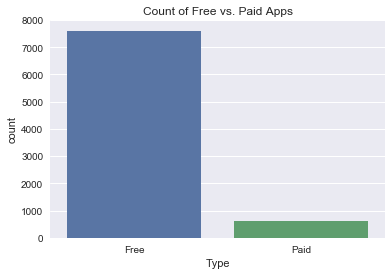

In [114]:
_ = sns.countplot(x = 'Type', data = apps)
_ = plt.title('Count of Free vs. Paid Apps')


In [115]:
(len(apps.loc[apps['Type'] == 'Paid'])/len(apps))*100

7.335201657121969

There are way more free apps than paid apps, which is expected. Only around 7% of the apps in this dataset are categorized as Paid apps. 

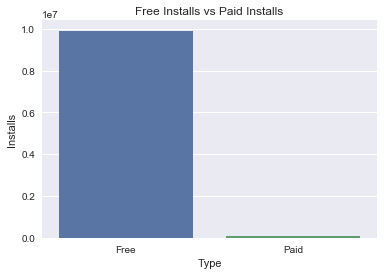

In [116]:
_ = sns.barplot(x = 'Type', y = 'Installs', data = apps, ci = None)
_ = plt.title('Free Installs vs Paid Installs')

In [117]:
np.sum(apps[apps['Type']=='Paid']['Installs'])/np.sum(apps[apps['Type']=='Free']['Installs'])*100

0.07608451772834907

Although paid apps make up 7% of all apps, they only make up less than 1% of all installs. 

## Most Paid for apps 

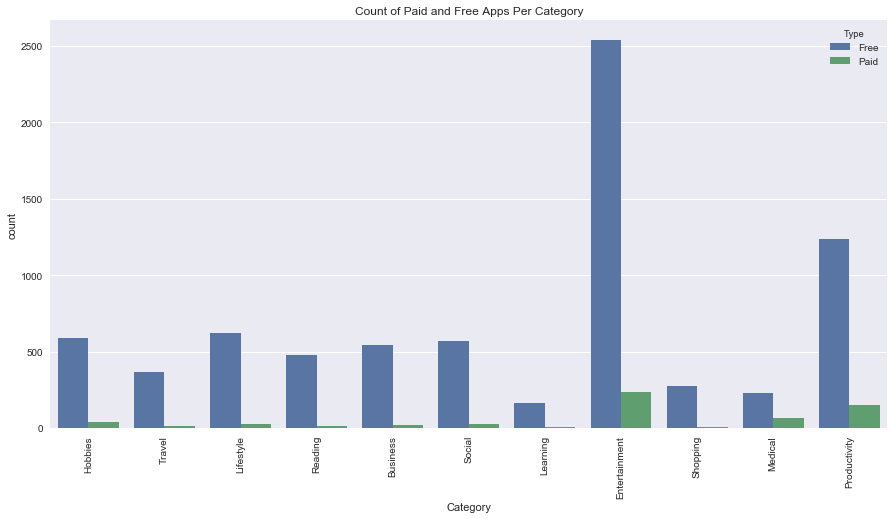

In [118]:
sns.set(style="darkgrid")
fig, ax = plt.subplots(figsize=(15,7.5))
sns.countplot(x = 'Category', data = apps, hue = 'Type', ax = ax)
_ = plt.xticks(rotation=90)
_ = plt.title('Count of Paid and Free Apps Per Category')


Some takeaways: Entertainment have most apps available for free apps by far and for paid apps as well, but not as large of a margin. Productivity apps surprisingly comes in 2nd for the paid and free apps. Lifestyle apps have quite a few free apps. Medical has a pretty high "free-to-paid" ratio at 3rd for paid apps, but 2nd to last in free.

This project must also take into account that this does not factor in **in-app purchases**

## Which category has the highest percentage of paid apps?

In [119]:
percents = dict()
for i in apps['Category'].unique():
    percent = (len(apps.loc[apps['Category'] == i].loc[apps['Type'] == 'Paid'])/len(apps.loc[apps['Category'] == i]))*100
    percents[i] = percent

                                                      

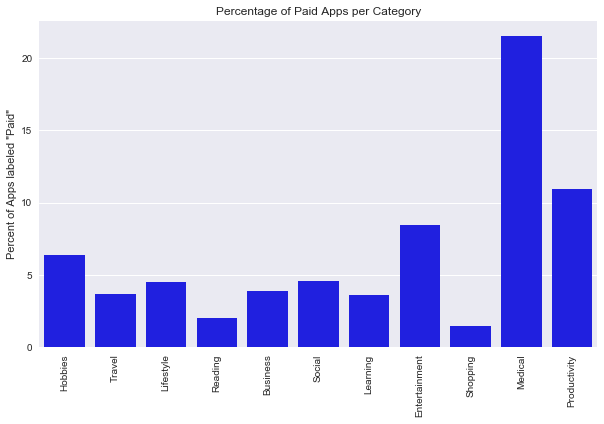

In [120]:
fig, ax = plt.subplots(figsize=(10,6))
_ = sns.barplot(x = list(percents.keys()), y = list(percents.values()), color = 'b', ax = ax)
_ = plt.xticks(rotation=90)
_ = plt.title('Percentage of Paid Apps per Category')
_ = plt.ylabel('Percent of Apps labeled "Paid"')
                             

The highets percentage of paid apps is Medical at 25%, and the second highest is productivity at around 12%. Productivity apps include the "Personalization" category, which allows for customization of your phone's software. 

Also take note that this is only on the Google Play Store. On the iPhone app store, unless you jailbreak your phone, you cannot customize your OS, keyboard, etc., so this category probably would not have as many apps. Android users pride themselves on being able to customize their phones, and this seems to be representative of that fact. 

## Which categories' paid apps are installed at the highest rate?

In [121]:
percent_installs = dict()
for i in apps['Category'].unique():
    percent = np.sum(apps.loc[apps['Category'] == i].loc[apps['Type'] == 'Paid']['Installs'])/np.sum(apps.loc[apps['Category'] == i]['Installs'])*100
    percent_installs[i] = percent

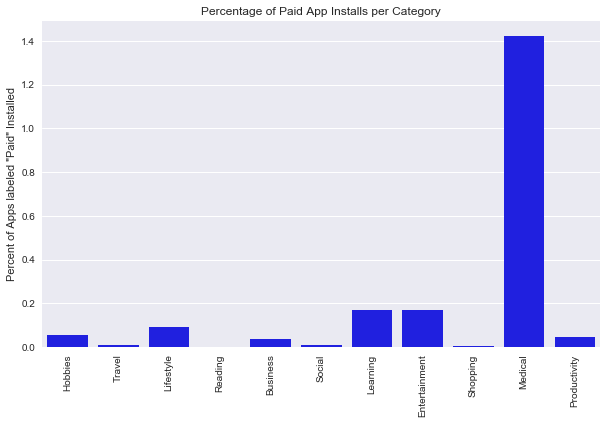

In [122]:
fig, ax = plt.subplots(figsize=(10,6))
_ = sns.barplot(x = list(percent_installs.keys()), y = list(percent_installs.values()), color = 'b', ax = ax)
_ = plt.xticks(rotation=90)
_ = plt.title('Percentage of Paid App Installs per Category')
_ = plt.ylabel('Percent of Apps labeled "Paid" Installed')
                             

By adding up all of the installs in the paid section of each category, and dividing it by the total amount of installs in that category, I have found that the medical category has the highest percentage of installs for paid apps by far, but even then, it is only at around 1.4% of all installs in that category. Most other categories are below 0.2% of app installs. 

This is interesting to see. 25% of all medical apps are paid for, but only 1.4% of the installs make up for them all.

## Do more paid apps lead to more installs of those paid apps?

In [123]:
from bokeh.plotting import figure, show
from bokeh.io import output_notebook
from bokeh.models import HoverTool, ColumnDataSource


In [124]:
percent_vs_installs = pd.DataFrame({'Category':list(percents.keys()), 'Install Percent': list(percent_installs.values()), 'Percent Paid': list(percents.values())})

In [125]:
output_notebook()
plot = figure(plot_width = 500, plot_height = 300, title = 'Slight Correlation between # of Paid Apps and # of Paid Installs', \
              x_axis_label = 'Percentage of Apps Paid', y_axis_label = 'Percentage of Installs of Paid Apps')
source = ColumnDataSource(data = percent_vs_installs)
plot.circle(x = 'Percent Paid', y = 'Install Percent', size = 9, source = source)
#plot.line()
hover_tool = HoverTool(tooltips = [('Category', '@Category')])
plot.tools.append(hover_tool)
show(plot)

Loading BokehJS ...

In [126]:
corr = np.corrcoef(percent_vs_installs['Percent Paid'], percent_vs_installs['Install Percent'])[0,1]**2
corr

0.7944324344680911

It looks like theres a positive correlation between the percentage of paid apps vs the percentage of apps installed that are paid for with an $R^2$ of about 0.79. It seems like there are many paid apps in the productivity category, but only about 0.1% of app installs are from paid apps, which indicates that you probably should not develop these apps if you are expecting people to buy your apps for money. Once again, entertainment stands out as a category that has a high percentage of paid app installs compared to the percentage of apps that are paid for. 

## What is the average price of the paid apps in each category?

In [127]:
prices = dict()
for i in apps['Category'].unique():
    price = np.mean(apps.loc[apps['Category']==i].loc[apps['Type'] == 'Paid']['Price'])
    prices[i] = price

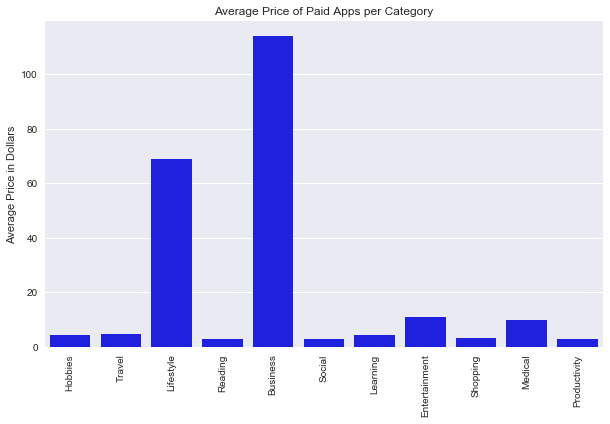

In [128]:
fig, ax = plt.subplots(figsize=(10,6))
_ = sns.barplot(x = list(prices.keys()), y = list(prices.values()), color = 'b', ax = ax)
_ = plt.xticks(rotation=90)
_ = plt.title('Average Price of Paid Apps per Category')
_ = plt.ylabel('Average Price in Dollars')

Something about Business and Lifestyle apps is making the average price become insanely high. We'll scope it out.

In [129]:
apps.loc[apps['Category'] == 'Business'].loc[apps['Type'] == 'Paid'].sort_values(by = 'Price',ascending = False).head(10)

,App,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver,Category
4127,I AM RICH PRO PLUS,4.0,36,5.7,1000,Paid,399.99,Everyone,Finance,2018-06-25,1.0.2,4.1 and up,Business
4110,I Am Rich Premium,4.1,1867,9.8,50000,Paid,399.99,Everyone,Finance,2017-11-12,1.6,4.0 and up,Business
4112,I am Rich!,3.8,93,15.0,1000,Paid,399.99,Everyone,Finance,2017-12-11,1.0,4.1 and up,Business
4113,I am rich(premium),3.5,472,15.0,5000,Paid,399.99,Everyone,Finance,2017-05-01,3.4,4.4 and up,Business
4118,I am rich (Most expensive app),4.1,129,15.0,1000,Paid,399.99,Teen,Finance,2017-12-06,2,4.0.3 and up,Business
4123,I am Rich,4.3,180,9.5,5000,Paid,399.99,Everyone,Finance,2018-03-22,1.0,4.2 and up,Business
4115,I am Rich Premium Plus,4.6,459,30.0,10000,Paid,18.99,Everyone,Finance,2018-02-17,1.1,4.0.3 and up,Business
5233,SkyTest BU/GU Lite,2.9,28,15.0,500,Paid,17.99,Everyone,Business,2017-10-24,2.0.5,3.0 and up,Business
6716,DS Helpdesk Plus,3.6,21,61.0,100,Paid,12.99,Everyone,Business,2017-01-30,Varies with device,Varies with device,Business
6342,DG Surveyor,3.6,5,5.1,50,Paid,8.99,Everyone,Business,2018-04-30,6.00,4.0.3 and up,Business


ahh.... there are a few apps that were made for the sole purpose of boasting about how much money you have, and they all cost aroun $400 each. I would drop these, but they actually have a few downloads, especially one with over 50,000.

In [130]:
apps.loc[apps['Category'] == 'Lifestyle'].loc[apps['Type'] == 'Paid'].sort_values(by = 'Price',ascending = False).head(10)

,App,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver,Category
3313,I'm Rich - Trump Edition,3.6,275,2.2,10000,Paid,400.00,Everyone,Lifestyle,2018-05-03,1.0.1,4.1 and up,Lifestyle
4106,I am rich,3.8,3547,12.0,100000,Paid,399.99,Everyone,Lifestyle,2018-01-12,2.0,4.0.3 and up,Lifestyle
3309,💎 I'm rich,3.8,718,93.0,10000,Paid,399.99,Everyone,Lifestyle,2018-03-11,1.0.0,4.4 and up,Lifestyle
4111,I am extremely Rich,2.9,41,5.7,1000,Paid,379.99,Everyone,Lifestyle,2018-07-01,1.0,4.0 and up,Lifestyle
4109,I am rich VIP,3.8,411,85.0,10000,Paid,299.99,Everyone,Lifestyle,2018-07-21,1.1.1,4.3 and up,Lifestyle
4114,I am Rich Person,4.2,134,46.0,1000,Paid,37.99,Everyone,Lifestyle,2017-07-18,1.0,4.0.3 and up,Lifestyle
5456,My Movies Pro - Movie & TV Collection Library,4.6,6477,50.0,10000,Paid,7.99,Everyone,Lifestyle,2018-07-16,2.26 Build 17,4.1 and up,Lifestyle
8153,Fast Tract Diet,4.4,35,15.0,1000,Paid,7.99,Everyone,Health & Fitness,2018-08-08,1.9.3,4.2 and up,Lifestyle
7361,The EO Bar,4.7,416,15.0,10000,Paid,6.99,Everyone,Health & Fitness,2018-07-02,1.3.7,4.1 and up,Lifestyle
4299,Sleep as Android Unlock,4.5,23966,46.0,1000000,Paid,5.99,Everyone,Lifestyle,2018-06-27,20180608,4.0 and up,Lifestyle


It's the same deal as in the lifestyle category, except one of these exceeds 100,000 installs. People are crazy.

### Removing the expensive useless apps

Because the goal of this project is to give some advice to developers as to what type of app to make, I have decided to drop the very expensive apps for the reason stated above. There is no way to make sure that these downloads for the apps are real downloads at the full price of the app, and I just do not believe that they were bought for $400 a piece. 

In [131]:
apps = apps.drop(apps[apps.Price > 200].index)

In [132]:
prices_low = dict()
for i in apps['Category'].unique():
    price = np.mean(apps.loc[apps['Category']==i].loc[apps['Type'] == 'Paid']['Price'])
    prices_low[i] = price

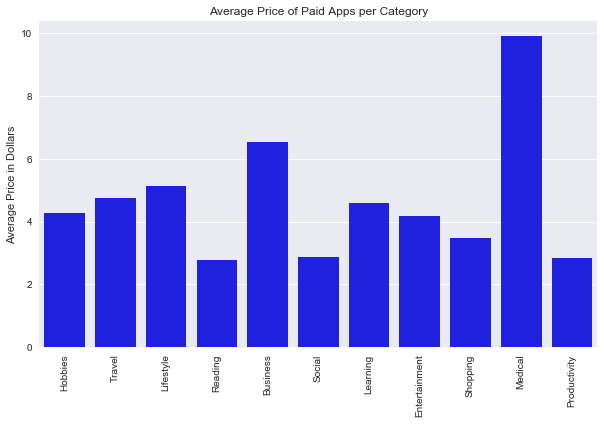

In [133]:
fig, ax = plt.subplots(figsize=(10,6))
_ = sns.barplot(x = list(prices_low.keys()), y = list(prices_low.values()), color = 'b', ax = ax)
_ = plt.xticks(rotation=90)
_ = plt.title('Average Price of Paid Apps per Category')
_ = plt.ylabel('Average Price in Dollars')

Medical apps have the highest average price at $10, and we also saw that they were also the most likely to be paid for.

## How much money do the paid apps pull in for each category?

In [134]:
#Adding a revenue column, which will be the price of the app times how many times it was installed
apps['Revenue'] = apps['Installs']*apps['Price']

Of course, this revenue column is making 2 big assumptions. The first is that the app was bought with the price that is advertised. There may have been sales which result in a download of a lower price, but I am assuming that most, if not all, of the apps were downloaded at full price. The second assumption is that the amount of installs is fairly close to the number it says. Before cleaning, there was a "+" at the end, indicating that it could be over that amount, and the increments, especially as the amount of installs increases, gets larger and larger. For example, an app could quite possibly have 85 million installs, but it will be labeled as 10,000,000+, even though it is closer to 100,000,000.

In [135]:
total_rev = dict()
for i in apps['Category'].unique():
    revenue = np.sum(apps.loc[apps['Category']==i].loc[apps['Type'] == 'Paid']['Revenue'])
    total_rev[i] = revenue

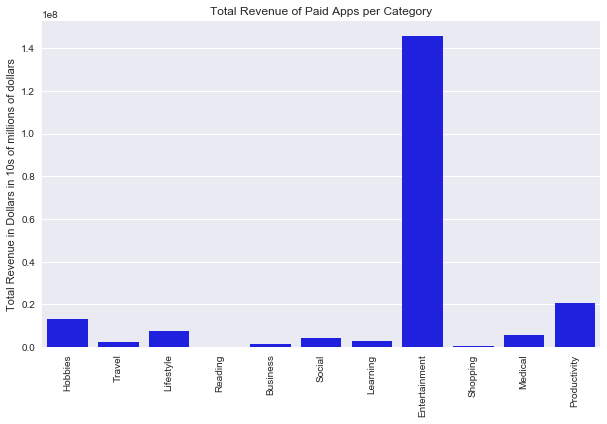

In [136]:
fig, ax = plt.subplots(figsize=(10,6))
_ = sns.barplot(x = list(total_rev.keys()), y = list(total_rev.values()), color = 'b', ax = ax)
_ = plt.xticks(rotation=90)
_ = plt.title('Total Revenue of Paid Apps per Category')
_ = plt.ylabel('Total Revenue in Dollars in 10s of millions of dollars')

Entertainment has the most amount of revenue, but as we saw earlier, it also has the highest number of apps.

In [137]:
revenues_cheap = dict()
for i in apps['Category'].unique():
    revenue = np.mean(apps.loc[apps['Category']==i].loc[apps['Type'] == 'Paid'].loc[apps['Price'] < 200]['Revenue'])
    revenues_cheap[i] = revenue

In [138]:
revenues_cheap_med = dict()
for i in apps['Category'].unique():
    revenue = np.median(apps.loc[apps['Category']==i].loc[apps['Type'] == 'Paid'].loc[apps['Price'] < 200]['Revenue'])
    revenues_cheap_med[i] = revenue

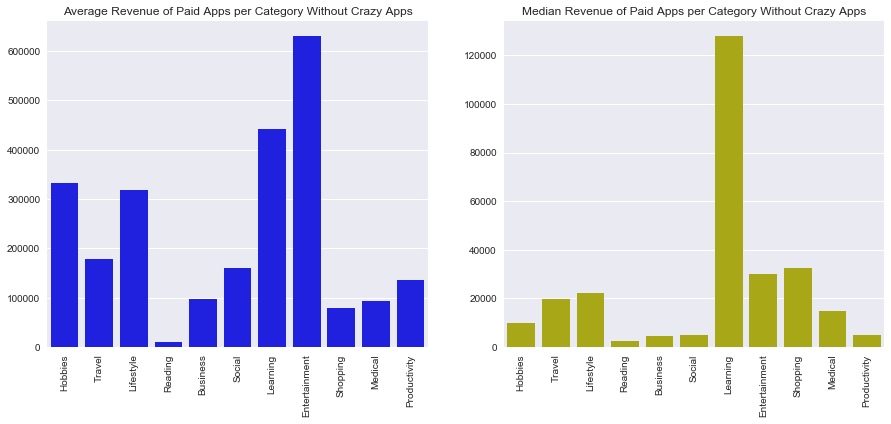

In [139]:
fig, ax = plt.subplots(1,2,figsize=(15,6))
_ = sns.barplot(x = list(revenues_cheap.keys()), y = list(revenues_cheap.values()), color = 'b', ax = ax[0])
_ = sns.barplot(x = list(revenues_cheap_med.keys()), y = list(revenues_cheap_med.values()), color = 'y', ax = ax[1])

_ = ax[0].set_title('Average Revenue of Paid Apps per Category Without Crazy Apps')
_ = ax[1].set_title('Median Revenue of Paid Apps per Category Without Crazy Apps')
_ = ax[0].set_xticklabels(list(revenues_cheap.keys()), rotation=90)
_ = ax[1].set_xticklabels(list(revenues_cheap_med.keys()), rotation=90)

In [140]:
apps.loc[apps['Category'] == 'Learning'].loc[apps['Type'] == 'Paid'].sort_values(by = 'Price', ascending = False)


,App,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver,Category,Revenue
638,Fuzzy Numbers: Pre-K Number Foundation,4.7,21,15.0,1000,Paid,5.99,Everyone,Education;Education,2017-07-21,1.3,4.1 and up,Learning,5990.0
4608,Baby Connect (activity log),4.7,8343,34.0,50000,Paid,4.99,Everyone,Parenting,2018-07-10,6.3.16,4.0.3 and up,Learning,249500.0
5803,SharedCare™ Co-parenting,2.0,23,70.0,100,Paid,4.59,Everyone,Parenting,2016-06-19,3.0.3,4.0 and up,Learning,459.0
637,Sago Mini Hat Maker,4.9,11,15.0,1000,Paid,3.99,Everyone,Education;Pretend Play,2017-07-24,1.0,4.0.3 and up,Learning,3990.0
639,Toca Life: City,4.7,31085,16.0,500000,Paid,3.99,Everyone,Education;Pretend Play,2018-07-06,1.5-play,4.4 and up,Learning,1995000.0
640,Toca Life: Hospital,4.7,3528,9.6,100000,Paid,3.99,Everyone,Education;Pretend Play,2018-06-12,1.1.1-play,4.4 and up,Learning,399000.0


This high value for median revenue for learning apps may be because there are only 6 learning apps that require you to pay,so the average can be swayed by 1 strong performer. In this case, it seems to be 'Toca Life: City', but the rest haven't done too bad either. 

In [141]:
apps.sort_values(by = 'Revenue', ascending = False).head(10)

,App,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver,Category,Revenue
1665,Minecraft,4.5,2376564,22.0,10000000,Paid,6.99,Everyone 10+,Arcade;Action & Adventure,2018-07-24,1.5.2.1,Varies with device,Entertainment,69900000.0
3069,Hitman Sniper,4.6,408292,26.0,10000000,Paid,0.99,Mature 17+,Action,2018-07-12,1.7.110758,4.1 and up,Entertainment,9900000.0
5604,Grand Theft Auto: San Andreas,4.4,348962,4.5,1000000,Paid,6.99,Mature 17+,Action,2015-03-21,1.08,3.0 and up,Entertainment,6990000.0
2133,Facetune - For Free,4.4,49553,15.0,1000000,Paid,5.99,Everyone,Photography,2018-07-25,1.3.1,4.1 and up,Hobbies,5990000.0
4299,Sleep as Android Unlock,4.5,23966,46.0,1000000,Paid,5.99,Everyone,Lifestyle,2018-06-27,20180608,4.0 and up,Lifestyle,5990000.0
6698,DraStic DS Emulator,4.6,87766,5.1,1000000,Paid,4.99,Everyone,Action,2016-07-19,r2.5.0.3a,2.3 and up,Entertainment,4990000.0
3134,Weather Live,4.5,76593,15.0,500000,Paid,5.99,Everyone,Weather,2017-11-21,Varies with device,Varies with device,Productivity,2995000.0
5564,Threema,4.5,51110,15.0,1000000,Paid,2.99,Everyone,Communication,2018-08-03,Varies with device,Varies with device,Social,2990000.0
7560,Tasker,4.6,43045,15.0,1000000,Paid,2.99,Everyone,Tools,2018-06-25,Varies with device,Varies with device,Productivity,2990000.0
6743,Bloons TD 5,4.6,190086,2.1,1000000,Paid,2.99,Everyone,Strategy,2018-07-13,3.16,2.3.3 and up,Entertainment,2990000.0


Minecraft has the highest revenue of all apps at a whopping 69.9 million dollars. Surprisingly, 4 of the top 10 apps with the highest revenues are those "I'm Rich" apps. Besides those apps, 4 of the top 10 are in the Entertainment category.

Also note that this data may not be 100% trustworthy. Many developers try to boost their app's ratings and install count by fraudulent means, meaning they either pay people to give 5 star reviews or to install the app. This may be the case for a few apps on here, but supposedly, in October 2016, Google Play decided to crack down on apps and prevent these things from happening. Whether or not they removed the installs and ratings from before is unknown to me, but that could explain why over 100,000 people bought a useless app for almost $400. 

Another thing that may explain the high amount of downloads in those types of apps is that they may have been on sale or been free for a promotion, which allowed it to increase in amount of downloads.

Let's see what the bar chart looks like without those apps in there.

These bar charts look a lot better. We can immediately see that Entertainment has the highest average revenue, but learning, hobbies, and lifestyle are all high up there too. 

Just like that, the median revenue for business goes down drastically. Learning is again the highest median revenue. The best balance between median and average revenue seems to be the learning apps, but as we saw earlier, this could be from the low number of paid apps in this category. 

In [142]:
installs = dict()
for i in apps['Category'].unique():
    revenue = np.mean(apps.loc[apps['Category']==i]['Installs'])
    installs[i] = revenue

In [143]:
installs_med = dict()
for i in apps['Category'].unique():
    revenue = np.median(apps.loc[apps['Category']==i]['Installs'])
    installs_med[i] = revenue

## Which categories get the most installs?

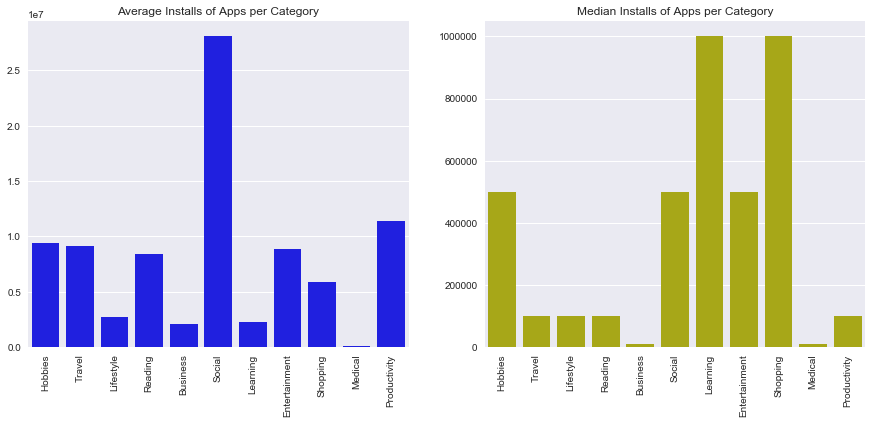

In [144]:
fig, ax = plt.subplots(1,2,figsize=(15,6))
_ = sns.barplot(x = list(installs.keys()), y = list(installs.values()), color = 'b', ax = ax[0])
_ = sns.barplot(x = list(installs_med.keys()), y = list(installs_med.values()), color = 'y', ax = ax[1])

_ = ax[0].set_title('Average Installs of Apps per Category')
_ = ax[1].set_title('Median Installs of Apps per Category')
_ = ax[0].set_xticklabels(list(installs.keys()), rotation=90)
_ = ax[1].set_xticklabels(list(installs_med.keys()), rotation=90)


The highest median installs belong to Social, Learning, entertainment, and Shopping, at around 1,000,000 installs per app. 

#### Shopping apps are mostly free and are provided by restaurant chains and delivery services. There might be some room for independent developers though 

In [145]:
apps.loc[apps['Category'] == 'Shopping'].sort_values(by = 'Installs', ascending = False).head(10)


,App,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver,Category,Revenue
1960,"AliExpress - Smarter Shopping, Better Living",4.6,5916606,28.0,100000000,Free,0.0,Teen,Shopping,2018-08-06,Varies with device,Varies with device,Shopping,0.0
1998,Flipkart Online Shopping App,4.4,6012719,15.0,100000000,Free,0.0,Teen,Shopping,2018-08-06,Varies with device,Varies with device,Shopping,0.0
1955,Wish - Shopping Made Fun,4.5,6210998,15.0,100000000,Free,0.0,Everyone,Shopping,2018-08-03,4.20.5,4.1 and up,Shopping,0.0
1964,Amazon Shopping,4.3,909226,9.5,100000000,Free,0.0,Teen,Shopping,2018-07-31,16.14.0.100,4.4 and up,Shopping,0.0
1962,eBay: Buy & Sell this Summer - Discover Deals ...,4.4,2788923,37.0,100000000,Free,0.0,Teen,Shopping,2018-07-30,Varies with device,Varies with device,Shopping,0.0
1974,The birth,4.7,1084945,7.7,50000000,Free,0.0,Teen,Shopping,2018-08-03,Varies with device,Varies with device,Shopping,0.0
1966,OLX - Buy and Sell,4.2,857923,28.0,50000000,Free,0.0,Everyone,Shopping,2018-07-31,11.7.3.0,4.1 and up,Shopping,0.0
1965,Lazada - Online Shopping & Deals,4.2,1573054,82.0,50000000,Free,0.0,Everyone,Shopping,2018-08-02,Varies with device,4.2 and up,Shopping,0.0
1963,"letgo: Buy & Sell Used Stuff, Cars & Real Estate",4.5,973270,36.0,50000000,Free,0.0,Teen,Shopping,2018-08-06,2.4.9,4.1 and up,Shopping,0.0
2015,"Groupon - Shop Deals, Discounts & Coupons",4.6,1370749,59.0,50000000,Free,0.0,Teen,Shopping,2018-08-03,Varies with device,Varies with device,Shopping,0.0


#### Learning apps have many apps with a lot of downloads, and many of them are by independent developers. Might be a good place for them to make an app.

In [146]:
apps.loc[apps['Category'] == 'Learning'].sort_values(by = 'Installs', ascending = False).head(10)


,App,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver,Category,Revenue
523,Duolingo: Learn Languages Free,4.7,6289924,2.0,100000000,Free,0.0,Everyone,Education;Education,2018-08-01,Varies with device,Varies with device,Learning,0.0
5487,Pregnancy Tracker & Countdown to Baby Due Date,4.7,658087,18.0,10000000,Free,0.0,Everyone,Parenting,2018-05-24,3.15.1,5.0 and up,Learning,0.0
626,ClassDojo,4.4,148550,15.0,10000000,Free,0.0,Everyone,Education;Education,2018-08-03,4.21.1,4.1 and up,Learning,0.0
527,Learn English with Wlingua,4.7,314299,17.0,10000000,Free,0.0,Everyone,Education,2018-05-02,1.94.9,4.0 and up,Learning,0.0
602,Google Classroom,4.2,69493,41.0,10000000,Free,0.0,Everyone,Education,2018-07-19,Varies with device,Varies with device,Learning,0.0
625,Remind: School Communication,4.5,108613,15.0,10000000,Free,0.0,Everyone,Education,2018-08-03,Varies with device,Varies with device,Learning,0.0
557,Lumosity: #1 Brain Games & Cognitive Training App,4.2,215301,18.0,10000000,Free,0.0,Everyone,Education,2018-08-01,Varies with device,Varies with device,Learning,0.0
524,TED,4.6,181893,1.9,10000000,Free,0.0,Everyone 10+,Education,2018-07-27,3.2.5,4.1 and up,Learning,0.0
611,"busuu: Learn Languages - Spanish, English & More",4.3,206527,15.0,10000000,Free,0.0,Everyone 10+,Education,2018-08-01,13.9.0.161,5.0 and up,Learning,0.0
567,Peak – Brain Games & Training,4.4,272145,14.0,10000000,Free,0.0,Everyone,Education;Brain Games,2018-08-03,3.14.15,5.0 and up,Learning,0.0


#### Alost every single app in the top 10 of the Social category are by major companies. Maybe not much room for an independent dev. 

In [147]:
apps.loc[apps['Category'] == 'Social'].sort_values(by = 'Installs', ascending = False).head(10)


,App,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver,Category,Revenue
286,Messenger – Text and Video Chat for Free,4.0,56642847,15.0,1000000000,Free,0.0,Everyone,Communication,2018-08-01,Varies with device,Varies with device,Social,0.0
1876,Instagram,4.5,66577313,12.0,1000000000,Free,0.0,Teen,Social,2018-07-31,Varies with device,Varies with device,Social,0.0
287,WhatsApp Messenger,4.4,69119316,15.0,1000000000,Free,0.0,Everyone,Communication,2018-08-03,Varies with device,Varies with device,Social,0.0
289,Google Chrome: Fast & Secure,4.3,9642995,15.0,1000000000,Free,0.0,Everyone,Communication,2018-08-01,Varies with device,Varies with device,Social,0.0
291,Gmail,4.3,4604324,15.0,1000000000,Free,0.0,Everyone,Communication,2018-08-02,Varies with device,Varies with device,Social,0.0
292,Hangouts,4.0,3419249,15.0,1000000000,Free,0.0,Everyone,Communication,2018-07-21,Varies with device,Varies with device,Social,0.0
336,Skype - free IM & video calls,4.1,10484169,15.0,1000000000,Free,0.0,Everyone,Communication,2018-08-03,Varies with device,Varies with device,Social,0.0
1875,Facebook,4.1,78158306,15.0,1000000000,Free,0.0,Teen,Social,2018-08-03,Varies with device,Varies with device,Social,0.0
1885,Google+,4.2,4831125,38.0,1000000000,Free,0.0,Teen,Social,2018-07-26,Varies with device,Varies with device,Social,0.0
344,LINE: Free Calls & Messages,4.2,10790289,2.8,500000000,Free,0.0,Everyone,Communication,2018-07-26,Varies with device,Varies with device,Social,0.0


#### Entertainment may provide a good playing field for independent developers, as about half are not by major companies. 

In [148]:
apps.loc[apps['Category'] == 'Entertainment'].sort_values(by = 'Installs', ascending = False).head(10)

,App,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver,Category,Revenue
2793,Google Play Movies & TV,3.7,906384,7.7,1000000000,Free,0.0,Teen,Video Players & Editors,2018-08-06,Varies with device,Varies with device,Entertainment,0.0
1275,Subway Surfers,4.5,27722264,25.0,1000000000,Free,0.0,Everyone 10+,Arcade,2018-07-12,1.90.0,4.1 and up,Entertainment,0.0
651,Google Play Games,4.3,7165362,17.0,1000000000,Free,0.0,Teen,Entertainment,2018-07-16,Varies with device,Varies with device,Entertainment,0.0
2771,YouTube,4.3,25655305,15.0,1000000000,Free,0.0,Teen,Video Players & Editors,2018-08-02,Varies with device,Varies with device,Entertainment,0.0
1282,Temple Run 2,4.3,8118609,60.0,500000000,Free,0.0,Everyone,Action,2018-07-05,1.49.1,4.0 and up,Entertainment,0.0
2809,MX Player,4.5,6474426,11.0,500000000,Free,0.0,Everyone,Video Players & Editors,2018-08-06,Varies with device,Varies with device,Entertainment,0.0
1276,Candy Crush Saga,4.4,22426677,74.0,500000000,Free,0.0,Everyone,Casual,2018-07-05,1.129.0.2,4.1 and up,Entertainment,0.0
1283,Pou,4.3,10485308,57.0,500000000,Free,0.0,Everyone,Casual,2018-05-25,1.4.77,4.0 and up,Entertainment,0.0
1329,My Talking Tom,4.5,14891223,48.0,500000000,Free,0.0,Everyone,Casual,2018-07-19,4.8.0.132,4.1 and up,Entertainment,0.0
3680,Talking Tom & Ben News,4.4,1131937,12.0,100000000,Free,0.0,Everyone,Entertainment,2018-04-30,2.4.0.7,4.1 and up,Entertainment,0.0


At this point in my analysis, if I were giving advice to a small developer I would advise him or her to begin production in either an educational app or a medical app if he wants to get paid. Medical apps have the highest percentage of apps that are paid for, and educational apps have a very high average and median revenue, though the small sample size may render this observation fruitless. 

If a developer were looking for a high amount of downloads so that he can use that to place ads on his app or to get his name out there, my recommendation would be for that person to make an app in the "game" category. They could also make an "entertainment" type app. Only about half of the top 10 most installs in that category are by large companies, but make sure the app is something for children. 

In [149]:
apps.to_csv('apps_rev.csv')

## What about the mean number of installs for paid apps?

In [150]:
paid_installs = dict()
for i in apps['Category'].unique():
    paid = np.mean(apps.loc[apps['Category']==i].loc[apps['Type'] =='Paid']['Installs'])
    paid_installs[i] = paid

In [151]:
paid_installs_med = dict()
for i in apps['Category'].unique():
    paid = np.median(apps.loc[apps['Category']==i].loc[apps['Type'] =='Paid']['Installs'])
    paid_installs_med[i] = paid

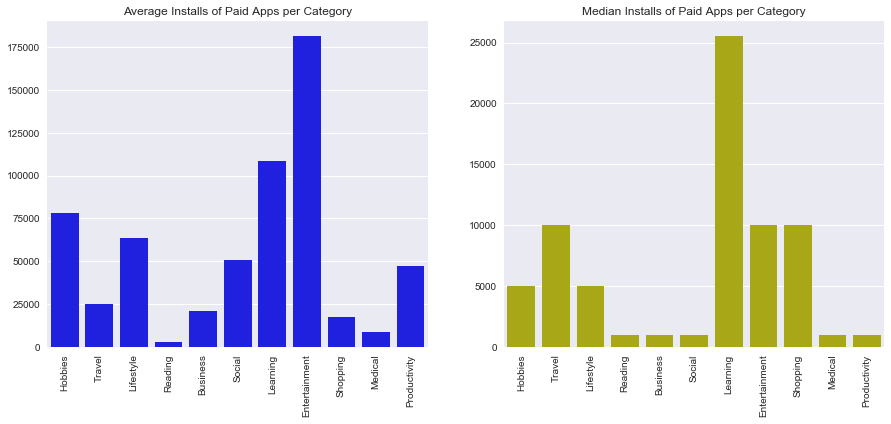

In [152]:
fig, ax = plt.subplots(1,2,figsize=(15,6))
_ = sns.barplot(x = list(paid_installs.keys()), y = list(paid_installs.values()), color = 'b', ax = ax[0])
_ = sns.barplot(x = list(paid_installs_med.keys()), y = list(paid_installs_med.values()), color = 'y', ax = ax[1])

_ = ax[0].set_title('Average Installs of Paid Apps per Category')
_ = ax[1].set_title('Median Installs of Paid Apps per Category')
_ = ax[0].set_xticklabels(list(paid_installs.keys()), rotation=90)
_ = ax[1].set_xticklabels(list(paid_installs_med.keys()), rotation=90)

The entertainment category has the highest average installs for paid apps, but it is isn't very high for the median number of installs. This may be caused by a few outlier paid apps, such as MineCraft, having a very high number of installs compared to the rest of the apps in that category that are very low. 

The highest median belongs to learning, at 25,000 installs per paid app. Learning has been explained because of the small sample size, but lets take a look at the Travel category, which has the second highest median for paid apps. 

In [153]:
apps.loc[apps['Category'] == 'Travel'].loc[apps['Type'] == 'Paid'].sort_values(by = 'Installs', ascending = False).head(10)


,App,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver,Category,Revenue
3104,Maps & GPS Navigation OsmAnd+,4.3,15209,9.9,100000,Paid,8.99,Everyone,Travel & Local,2018-08-01,Varies with device,Varies with device,Travel,899000.0
4623,BackCountry Navigator TOPO GPS PRO,4.5,6230,17.0,100000,Paid,11.99,Everyone,Maps & Navigation,2018-08-03,Varies with device,Varies with device,Travel,1199000.0
3199,Ulysse Speedometer Pro,4.6,4140,3.8,50000,Paid,1.99,Everyone,Auto & Vehicles,2018-05-13,Varies with device,Varies with device,Travel,99500.0
6029,Navigator PRO - GPS Navigation with Offline Maps,3.6,892,17.0,50000,Paid,2.49,Everyone,Travel & Local,2018-08-01,1.08,4.0 and up,Travel,124500.0
4371,BringGo AU & NZ,2.8,440,7.4,10000,Paid,0.99,Everyone,Maps & Navigation,2018-05-10,2.5.9,2.3.3 and up,Travel,9900.0
5581,Paris ci la Sortie du Métro,4.2,453,36.0,10000,Paid,2.99,Everyone,Maps & Navigation,2018-04-02,4.3,4.1 and up,Travel,29900.0
7556,Campervan.Guide Pro,4.2,238,15.0,10000,Paid,5.99,Everyone,Travel & Local,2018-06-22,4.6.2,4.1 and up,Travel,59900.0
7633,XE Currency Pro,4.4,1090,15.0,10000,Paid,1.99,Everyone,Travel & Local,2018-05-29,Varies with device,Varies with device,Travel,19900.0
5547,"Ultimate Public Campgrounds (Over 37,100 in US...",4.7,213,3.1,5000,Paid,3.99,Everyone,Travel & Local,2018-08-05,1.8.8.0,4.4 and up,Travel,19950.0
6298,DC Metro Transit,4.5,339,99.0,5000,Paid,2.99,Everyone,Travel & Local,2018-05-13,5.11.3,4.1 and up,Travel,14950.0


A few in the top 10 for Travel apps are metro apps, but many of these seem to be from independent developers. There may be room here for budding developers.

# Checking to see if the rating of an app affects the number of installs

In [154]:
output_notebook()
plot = figure(plot_width = 500, plot_height = 300, title = 'Almost no Correlation between Rating and Number of Installs', \
              x_axis_label = 'Rating', y_axis_label = 'Number of Installs (log scale)', y_axis_type = 'log')
source = ColumnDataSource(data = apps)
plot.circle(x = 'Rating', y = 'Installs', size = 5, source = source)
#plot.line()
hover_tool = HoverTool(tooltips = [('App', '@App')])
plot.tools.append(hover_tool)
show(plot)

Loading BokehJS ...

In [155]:
corr = np.corrcoef(apps['Rating'], np.log(apps['Installs']))[0,1]**2
corr

0.007047146613155264

It seems that there is a slight correlation in the log transformed number of installs and the rating that the app has on the app score, but the correlation is near zero. If there was a correlation, then that would have meant that there was an exponential relationship between rating and the number of installs, but I guess there isn't. The reason that this may look like there is a correlation is because, as the installs get higher, there are also less apps present, so even though it looks there are apps up there, they do not sway the correlation that much. 

## Are there correlations between the fields I calculated?

In [156]:
size = dict()
for i in apps['Category'].unique():
    revenue = np.mean(apps.loc[apps['Category']==i]['Size'])
    size[i] = revenue

In [157]:
calced = pd.DataFrame({'Category':list(percents.keys()), \
                       'Paid Install Percent': list(percent_installs.values()), 'Percent of Apps Paid': list(percents.values()),\
                       'Number of Installs': list(installs.values()),'Median Installs': list(installs_med.values()),\
                      'Average Revenue':list(revenues_cheap.values()), 'Median Revenue':list(revenues_cheap_med.values()),\
                      'Size':list(size.values())})

In [158]:
calced.head()

,Category,Paid Install Percent,Percent of Apps Paid,Number of Installs,Median Installs,Average Revenue,Median Revenue,Size
0,Hobbies,0.053230,6.349206,9.358337e+06,500000.0,332101.095000,9950.0,21.032346
1,Travel,0.010231,3.703704,9.130309e+06,100000.0,177824.214286,19925.0,16.889635
2,Lifestyle,0.093248,4.468413,2.750954e+06,100000.0,317725.808333,22425.0,22.684479
3,Reading,0.000681,2.040816,8.430442e+06,100000.0,9534.650000,2535.0,19.830722
4,Business,0.034561,3.893805,2.061301e+06,10000.0,98432.650000,4490.0,19.925531


In [159]:
calced.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11 entries, 0 to 10
Data columns (total 8 columns):
Category                11 non-null object
Paid Install Percent    11 non-null float64
Percent of Apps Paid    11 non-null float64
Number of Installs      11 non-null float64
Median Installs         11 non-null float64
Average Revenue         11 non-null float64
Median Revenue          11 non-null float64
Size                    11 non-null float64
dtypes: float64(7), object(1)
memory usage: 784.0+ bytes


In [160]:
calced.fillna('0',inplace = True)

In [161]:
int_cols = ['Paid Install Percent','Size','Percent of Apps Paid','Number of Installs','Median Installs','Average Revenue','Median Revenue']

In [162]:
for i in int_cols:
    calced[i] = calced[i].astype(int)

In [163]:
calced.to_csv('calced.csv')

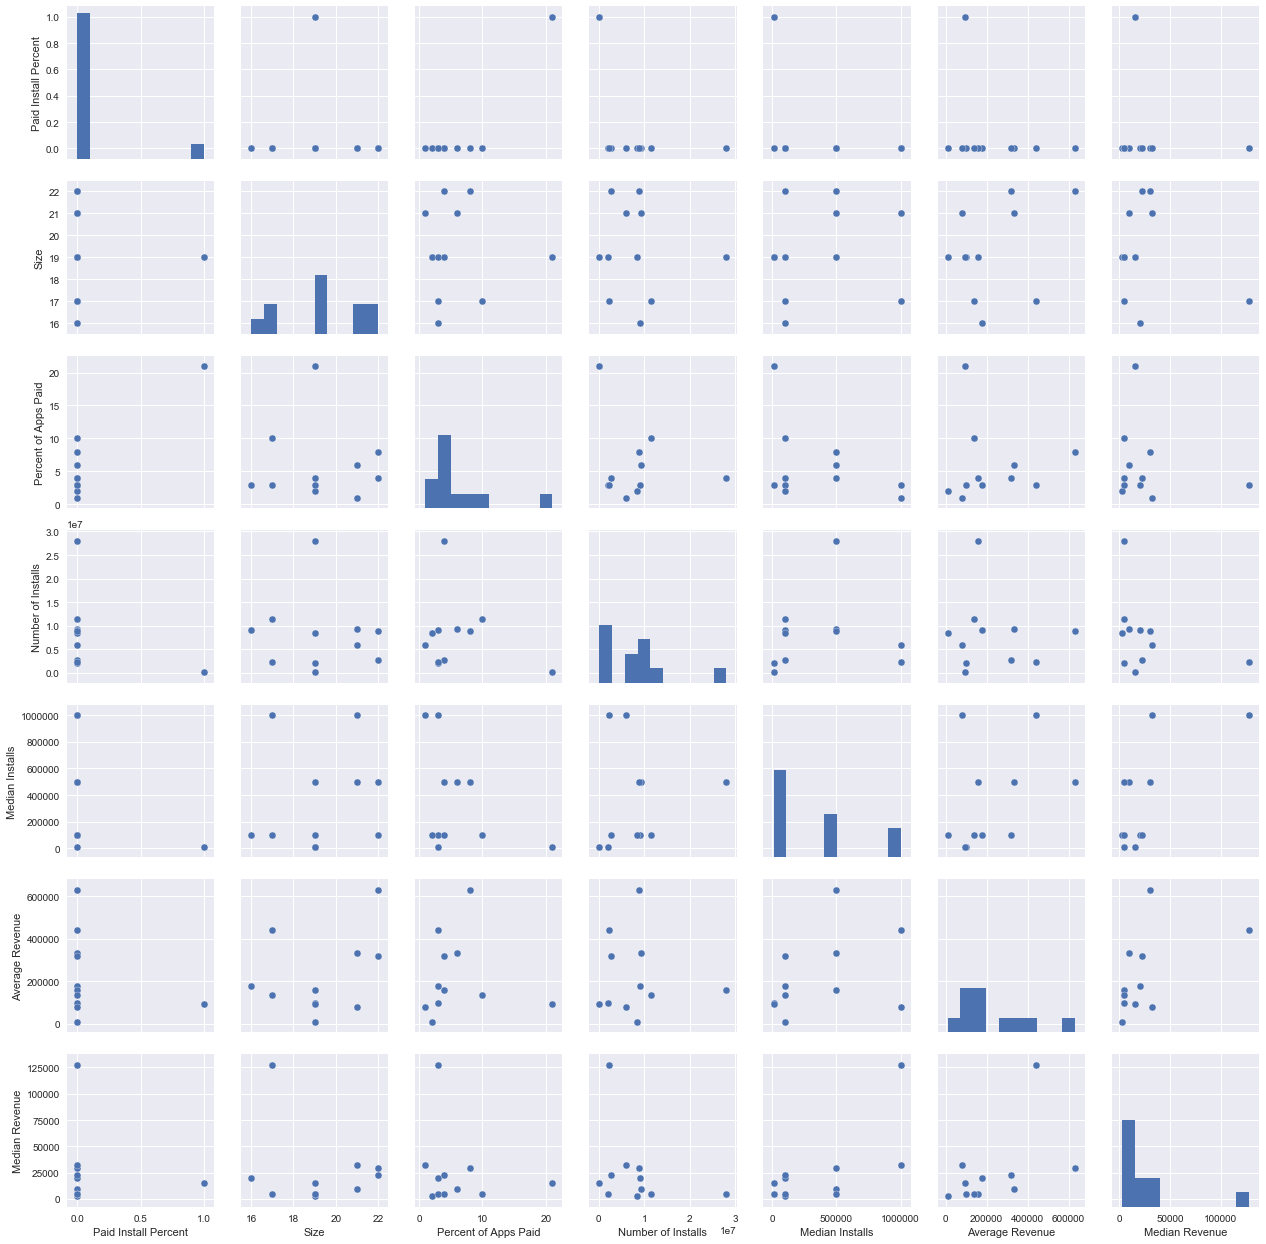

In [164]:
#Each point in the pair plot is a different category.
_ = sns.pairplot(calced[['Paid Install Percent','Size','Percent of Apps Paid','Number of Installs','Median Installs','Average Revenue','Median Revenue']])

In [165]:
calced[['Paid Install Percent','Size','Percent of Apps Paid','Number of Installs','Median Installs','Average Revenue','Median Revenue']].corr()

,Paid Install Percent,Size,Percent of Apps Paid,Number of Installs,Median Installs,Average Revenue,Median Revenue
Paid Install Percent,1.000000,-0.044042,0.883529,-0.343804,-0.307761,-0.234763,-0.092487
Size,-0.044042,1.000000,-0.023441,-0.086872,0.160564,0.339389,-0.216200
Percent of Apps Paid,0.883529,-0.023441,1.000000,-0.213274,-0.379459,-0.010639,-0.175112
Number of Installs,-0.343804,-0.086872,-0.213274,1.000000,0.106030,-0.064365,-0.327841
Median Installs,-0.307761,0.160564,-0.379459,0.106030,1.000000,0.381950,0.675828
Average Revenue,-0.234763,0.339389,-0.010639,-0.064365,0.381950,1.000000,0.503751
Median Revenue,-0.092487,-0.216200,-0.175112,-0.327841,0.675828,0.503751,1.000000


None of the calculated fields that I found seem to have that great of a correlation with one another. The strongest correlations are between *Paid Install Percent* and *Percent of Apps Paid*, *Number of Installs* and *Median Installs*, and *Median Revenue* and *Median Installs*. There is also a slight negative correlation between *Median Installs* and *Paid Install Percent*.

The ones that I find interesting are the first and 3rd one. The first correlation implies that the higher percentage of paid apps in a category lead to a higher percentage of paid app installs compared to the total. Just because there are more paid apps doesn't mean that there are more installs for those paid apps, but this correlation would imply that this is so. 

The 3rd correlation is interesting to me because the Median Installs takes into account *all* apps, not just the paid ones. So if the category has a high median install count, then there may be a higher chance that that could also lead to a higher revenue. 

The negative correlation could be telling where the more likely an app in a category is paid for, then it is less likely that your app will be installed a lot, which makes sense since paid apps are installed at a much lower rate than free apps.

Side note: the size of the app file has a slight positive correlation with the average revenue, but that could just be a coincidence. 

## Let's take a look at that other dataset

In [166]:
reviews.drop('Unnamed: 0', inplace = True, axis = 1)

In [167]:
reviews.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29692 entries, 0 to 29691
Data columns (total 6 columns):
App                       29692 non-null object
Translated_Review         29692 non-null object
Sentiment                 29692 non-null object
Sentiment_Polarity        29692 non-null float64
Sentiment_Subjectivity    29692 non-null float64
Label                     29692 non-null int64
dtypes: float64(2), int64(1), object(3)
memory usage: 1.4+ MB


In [168]:
reviews.head()

,App,Translated_Review,Sentiment,Sentiment_Polarity,Sentiment_Subjectivity,Label
0,10 Best Foods for You,i like eat delicious food. that's i'm cooking ...,Positive,1.00,0.533333,1
1,10 Best Foods for You,this help eating healthy exercise regular basis,Positive,0.25,0.288462,1
2,10 Best Foods for You,works great especially going grocery store,Positive,0.40,0.875000,1
3,10 Best Foods for You,best idea us,Positive,1.00,0.300000,1
4,10 Best Foods for You,best way,Positive,1.00,0.300000,1


In [169]:
app_cat = apps[['App','Category']]

In [170]:
reviews = reviews.merge(app_cat, on = ['App'], how = 'left')

In [171]:
reviews.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 29840 entries, 0 to 29839
Data columns (total 7 columns):
App                       29840 non-null object
Translated_Review         29840 non-null object
Sentiment                 29840 non-null object
Sentiment_Polarity        29840 non-null float64
Sentiment_Subjectivity    29840 non-null float64
Label                     29840 non-null int64
Category                  28398 non-null object
dtypes: float64(2), int64(1), object(4)
memory usage: 1.8+ MB


In [172]:
(reviews.loc[reviews['Category'].isnull()]).nunique()

App                         49
Translated_Review         1366
Sentiment                    3
Sentiment_Polarity         493
Sentiment_Subjectivity     412
Label                        2
Category                     0
dtype: int64

In [173]:
reviews.fillna('none', inplace = True)

In [174]:
reviews.head()

,App,Translated_Review,Sentiment,Sentiment_Polarity,Sentiment_Subjectivity,Label,Category
0,10 Best Foods for You,i like eat delicious food. that's i'm cooking ...,Positive,1.00,0.533333,1,Lifestyle
1,10 Best Foods for You,this help eating healthy exercise regular basis,Positive,0.25,0.288462,1,Lifestyle
2,10 Best Foods for You,works great especially going grocery store,Positive,0.40,0.875000,1,Lifestyle
3,10 Best Foods for You,best idea us,Positive,1.00,0.300000,1,Lifestyle
4,10 Best Foods for You,best way,Positive,1.00,0.300000,1,Lifestyle


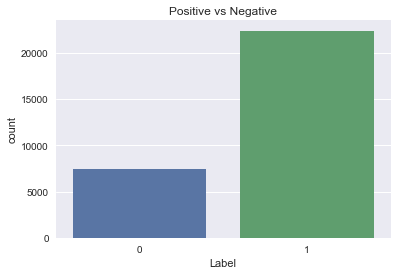

In [175]:
_ = sns.countplot(x = 'Label', data = reviews)
_ = plt.title('Positive vs Negative')

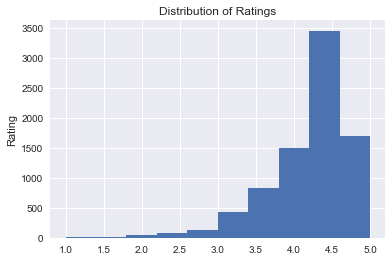

In [176]:
_ = plt.hist(apps['Rating'])
_ = plt.ylabel('Rating')
_ = plt.title('Distribution of Ratings')

According to my algorithm, most reviews of the apps are positive, which makes sense since most of the reviews for the apps are around 4 stars. 

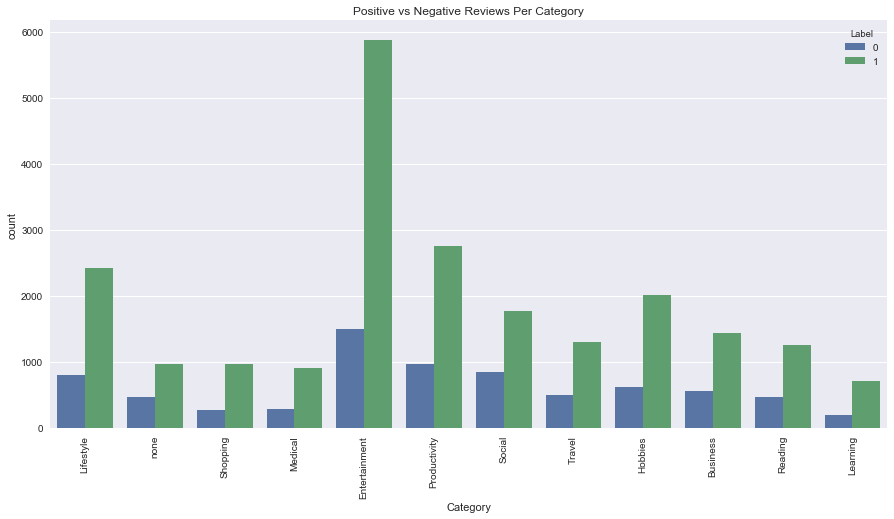

In [177]:
fig, ax = plt.subplots(figsize=(15,7.5))
sns.countplot(x = 'Category', data = reviews, hue = 'Label', ax = ax)
_ = plt.xticks(rotation=90)
_ = plt.title('Positive vs Negative Reviews Per Category')

Entertainment apps have, by far, the most amount of reviews and negative reviews. 

In [178]:
positive_rate = dict()
for i in reviews['Category'].unique():
    positive = 100*len(reviews.loc[reviews['Category']==i].loc[reviews['Label'] == 1])/len(reviews.loc[reviews['Category'] == i])
    positive_rate[i] = positive

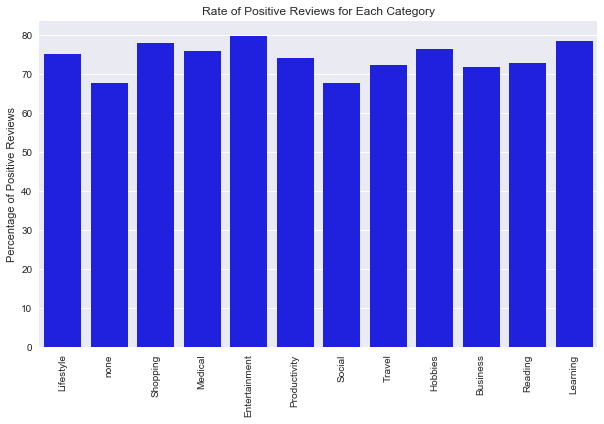

In [179]:
fig, ax = plt.subplots(figsize=(10,6))
_ = sns.barplot(x = list(positive_rate.keys()), y = list(positive_rate.values()), color = 'b', ax = ax)
_ = plt.xticks(rotation=90)
_ = plt.title('Rate of Positive Reviews for Each Category')
_ = plt.ylabel('Percentage of Positive Reviews')

They are all rated positively at relatively the same rate. The lowest rated one category is Social, being the only category sitting below 70%. 

In [353]:
reviews['App'].nunique()

865

There are only 865 unique apps in this dataset... I don't think it's all the apps from the first dataset.

In [354]:
reviews.head()

,App,Translated_Review,Sentiment,Sentiment_Polarity,Sentiment_Subjectivity,Label,Category
0,10 Best Foods for You,i like eat delicious food. that's i'm cooking ...,Positive,1.00,0.533333,1,Lifestyle
1,10 Best Foods for You,this help eating healthy exercise regular basis,Positive,0.25,0.288462,1,Lifestyle
2,10 Best Foods for You,works great especially going grocery store,Positive,0.40,0.875000,1,Lifestyle
3,10 Best Foods for You,best idea us,Positive,1.00,0.300000,1,Lifestyle
4,10 Best Foods for You,best way,Positive,1.00,0.300000,1,Lifestyle


In [355]:
avg_rating = dict()
for i in reviews['App'].unique():
    avg_rating[i] = np.mean(reviews.loc[reviews['App'] == i]['Label'])

In [356]:
avg_rating_df = pd.DataFrame({'App':list(avg_rating.keys()), 'avg_rating':list(avg_rating.values())})

In [357]:
avg_rating_df.head()

,App,avg_rating
0,10 Best Foods for You,0.821053
1,104 找工作 - 找工作 找打工 找兼職 履歷健檢 履歷診療室,0.861111
2,11st,0.538462
3,1800 Contacts - Lens Store,0.850000
4,1LINE – One Line with One Touch,0.631579


This "avg_rating" is not the average rating that averages the ratings that reviewers gave the app. This is more in line with the way *Rotten Tomatoes* operates, and is merely the percentage of reviews that were considered positive out of all of the reviews. So just because an app may have 100% positive reviews, does not mean that it is the best app ever, just that 100% reviewed it positively. 

In [358]:
with_reviews = avg_rating_df.merge(apps, how = 'inner', on = 'App')

In [359]:
with_reviews.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 821 entries, 0 to 820
Data columns (total 15 columns):
App               821 non-null object
avg_rating        821 non-null float64
Rating            821 non-null float64
Reviews           821 non-null int64
Size              821 non-null float64
Installs          821 non-null int64
Type              821 non-null object
Price             821 non-null float64
Content Rating    821 non-null object
Genres            821 non-null object
Last Updated      821 non-null datetime64[ns]
Current Ver       821 non-null object
Android Ver       821 non-null object
Category          821 non-null object
Revenue           821 non-null float64
dtypes: datetime64[ns](1), float64(5), int64(2), object(7)
memory usage: 102.6+ KB


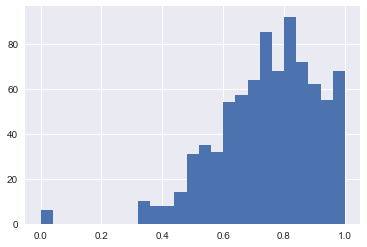

In [360]:
_ = plt.hist(with_reviews['avg_rating'], bins = 25)

Most apps are generally viewed more favorably. 

In [361]:
output_notebook()
plot = figure(plot_width = 500, plot_height = 300, x_axis_label = 'Average Rating',\
              title = 'No correlation betwen avg. Rating and Installs',y_axis_label = 'Number of Installs')
source = ColumnDataSource(data = with_reviews)
plot.circle(x = 'avg_rating', y = 'Installs', size = 7, source = source)
hover_tool = HoverTool(tooltips = [('App', '@App'),('Percent Positive','@avg_rating')])
plot.tools.append(hover_tool)
show(plot)

Loading BokehJS ...

In [362]:
corr = np.corrcoef(with_reviews['Installs'], with_reviews['avg_rating'])[0,1]**2
corr

0.0030384559455486296

There doesn't seem to be a correlation between average rating and number of installs. But if there is one, then it is very low. 

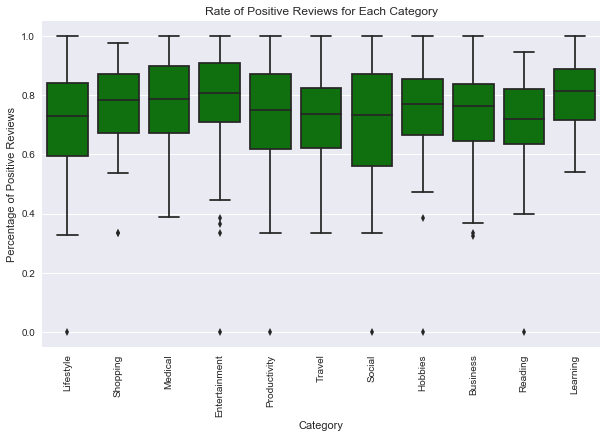

In [363]:
fig, ax = plt.subplots(figsize=(10,6))
_ = sns.boxplot(x = 'Category', y = 'avg_rating',data=with_reviews, color = 'g', ax = ax)
_ = plt.xticks(rotation=90)
_ = plt.title('Rate of Positive Reviews for Each Category')
_ = plt.ylabel('Percentage of Positive Reviews')

There's almost no difference in the ratings by category. 

In [364]:
output_notebook()
plot = figure(plot_width = 500, plot_height = 300, x_axis_label = 'Average Rating',\
              title = 'There is no Correlation between Revenue and Avg. Rating',y_axis_label = 'Revenue')
source = ColumnDataSource(data = with_reviews.loc[with_reviews['Type'] == 'Paid'])
plot.circle(x = 'avg_rating', y = 'Revenue', size = 9, source = source)
#plot.line()
hover_tool = HoverTool(tooltips = [('App', '@App')])
plot.tools.append(hover_tool)
show(plot)

Loading BokehJS ...

Unfortunately, of the apps that were provided in the reviews table, only less than 10 of them are in the "paid" category in the apps table. 

In [365]:
corr = np.corrcoef(with_reviews.loc[with_reviews['Type'] == 'Paid']['Revenue']\
                   , with_reviews.loc[with_reviews['Type'] == 'Paid']['avg_rating'])[0,1]**2
corr

0.00011299005842503686

From this very small sample size, we see that there is no correlation between revenue and the rating the app recieved. 

In [366]:
from bokeh.layouts import row
output_notebook()
plot = figure(plot_width = 400, plot_height = 300, x_axis_label = 'Installs (log)', y_axis_label = 'Revenue', \
              title = 'Revenue vs. Installs on Log Scale', x_axis_type = 'log')
source = ColumnDataSource(data = apps.loc[apps['Type'] == 'Paid'])
plot.circle(x = 'Installs', y = 'Revenue', size = 7, source = source)
hover_tool = HoverTool(tooltips = [('App', '@App')])
plot.tools.append(hover_tool)

plot2 = figure(plot_width = 400, plot_height = 300, x_axis_label = 'Number of Reviews', y_axis_label = 'Revenue',\
               title= 'Revenue vs. Number of Reviews on Log Scale',x_axis_type = 'log')
source = ColumnDataSource(data = apps.loc[apps['Type'] == 'Paid'])
plot2.circle(x = 'Reviews', y = 'Revenue', size = 7, source = source)
plot2.tools.append(hover_tool)
show(row(plot,plot2))

Loading BokehJS ...

As you can see from the above plots of revenue vs installs and number of reviews, on a log scale, there is quite an obvious positive correlation between them. Let us look at the $R^2$ values for these.

In [373]:
corr = np.corrcoef(apps.loc[apps['Type'] == 'Paid']['Installs']\
                   , apps.loc[apps['Type'] == 'Paid']['Revenue'])[0,1]**2
print ("The R^2 value between Installs and Revenue = ", corr)

The R^2 value between Installs and Revenue =  0.6296816302687304


In [374]:
corr = np.corrcoef(apps.loc[apps['Type'] == 'Paid']['Reviews']\
                   , apps.loc[apps['Type'] == 'Paid']['Revenue'])[0,1]**2
print ("The R^2 value between number of Reviews and Revenue = ", corr)

The R^2 value between number of Reviews and Revenue =  0.9743407407227181


In [375]:
corr = np.corrcoef(apps.loc[apps['Type'] == 'Paid']['Installs']\
                   , apps.loc[apps['Type'] == 'Paid']['Reviews'])[0,1]**2
print ("The R^2 value between number of Reviews and number of Installs = ", corr)

The R^2 value between number of Reviews and number of Installs =  0.6512846977864168


The correlation between # of installs and revenue is quite high an $R^2$ of 0.62, but it is very interesting to see how strong the correlation between the # of reviews and the revenue is, which comes in at an $R^2$ of 0.97! 

The fact that neither the correlation between # of installs and # of reviews nor the correlation between # of Installs and Revenue is nearly as high as the correlation between # of reviews and revenue tells me that the number of reviews is especially significant in predicting the revenue of an app, regardless of whether or not those reviews are positive. 

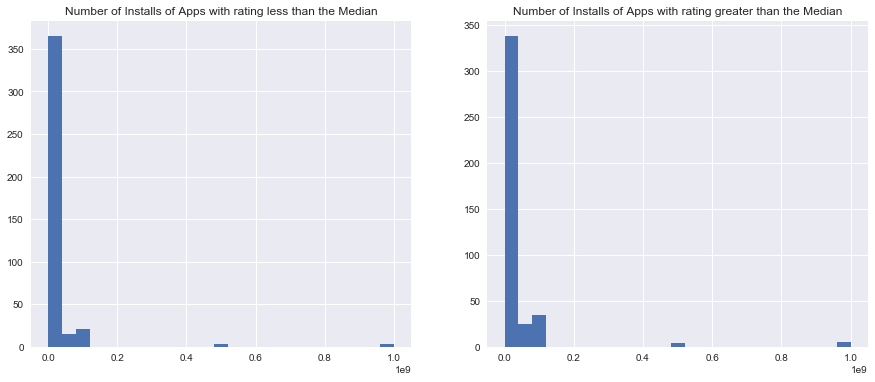

In [405]:
fig, (ax1,ax2) = plt.subplots(1,2,figsize=(15,6))
_ = ax1.hist(with_reviews.loc[with_reviews['avg_rating']<np.median(with_reviews['avg_rating'])]['Installs'], bins = 25)
_ = ax1.set_title('Number of Installs of Apps with rating less than the Median')
_ = ax2.hist(with_reviews.loc[with_reviews['avg_rating']>np.median(with_reviews['avg_rating'])]['Installs'], bins = 25)
_ = ax2.set_title('Number of Installs of Apps with rating greater than the Median')

As you can see, there is almost no difference in the distribution between the number of installs with lower ratings vs. apps with higher ratings. 

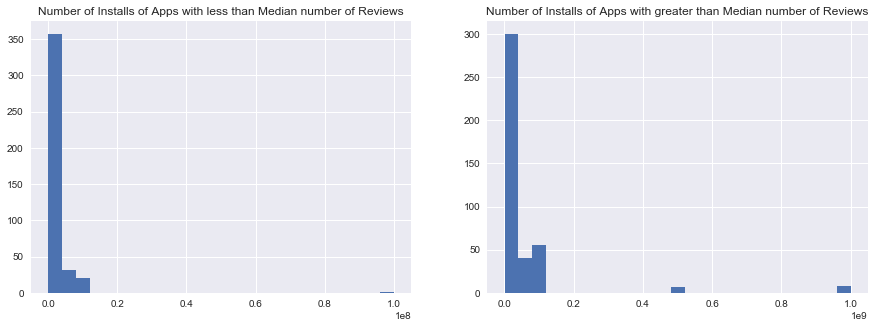

In [404]:
fig, (ax1,ax2) = plt.subplots(1,2,figsize=(15,5))
_ = ax1.hist(with_reviews.loc[with_reviews['Reviews']<np.median(with_reviews['Reviews'])]['Installs'], bins = 25)
_ = ax1.set_title('Number of Installs of Apps with less than Median number of Reviews')
_ = ax2.hist(with_reviews.loc[with_reviews['Reviews']>np.median(with_reviews['Reviews'])]['Installs'], bins = 25)
_ = ax2.set_title('Number of Installs of Apps with greater than Median number of Reviews')



On the other hand, there is a significant difference in the number of installs between the apps with a lower number of reviews vs apps with a higher number of reviews.

In [369]:
with_reviews.to_csv('with_avg.csv')